### Read MHCII peptides dataframe

In [1]:
import pandas as pd

MHCII_peptides = pd.read_csv("/Volumes/h345/afarkkilab/Projects/NKI/Top28HLAIIAntigens/MHCII_peptides/Data/MHCII_binders_peptides.csv")
MHCII_peptides.head(5)

,Peptide,Peptide Length,Gene,Number of times the gene is found in both the runs,Run,Found_In_Patients by run,Shared_Across_Patients_byRun,Patient_1,Patient_2,Patient_3,Patient_4,Patient_5,Patient_6,Patient_7,Patient_8,Patient_9,Patient_10,Patient_11,Patient_12
0,PRGPPASSPAPAPK,14,ZYX,3.0,Run1,patient05,No,0,0,0,0,1,0,0,0,0,0,0,0
1,APRPSPAISVSVSAPAF,17,ZYX,3.0,Run1,patient06,No,0,0,0,0,0,1,0,0,0,0,0,0
2,SPQPPSFTYAQQREKPR,17,ZYX,3.0,Run2,patient12,No,0,0,0,0,0,0,0,0,0,0,0,1
3,TPKYAKLEERTGY,13,ZRANB2,1.0,Run1,patient05,No,0,0,0,0,1,0,0,0,0,0,0,0
4,LEKYIDGEELRVIP,14,ZNRF3,1.0,Run1,patient06,No,0,0,0,0,0,1,0,0,0,0,0,0


### Prepare dataframe with per patient presence of peptides for selected genes

In [2]:
# Melt the DataFrame so each row is a patient-peptide-gene observation
melted = MHCII_peptides.melt(id_vars=['Peptide', 'Gene'], 
                value_vars=[col for col in MHCII_peptides.columns if col.startswith('Patient_')],
                var_name='Patient', 
                value_name='Presence')

print(melted.shape)
print(melted.head(5))

# Filter only where peptide is present (value == 1)
present = melted[melted['Presence'] == 1]

print(present.shape)
print(present.head(5))

# Group by Patient and Gene, count how many peptides mapped to each gene
gene_counts = present.groupby(['Patient', 'Gene']).size().unstack(fill_value=0).reset_index()

# Set 'Patient' as index if not already
gene_counts.set_index('Patient', inplace=True)

# Create the desired patient order
ordered_patients = [f'Patient_{i}' for i in range(1, 13)]
# Reorder the DataFrame
gene_counts_ordered = gene_counts.loc[ordered_patients]

(255744, 4)
             Peptide    Gene    Patient  Presence
0     PRGPPASSPAPAPK     ZYX  Patient_1         0
1  APRPSPAISVSVSAPAF     ZYX  Patient_1         0
2  SPQPPSFTYAQQREKPR     ZYX  Patient_1         0
3      TPKYAKLEERTGY  ZRANB2  Patient_1         0
4     LEKYIDGEELRVIP   ZNRF3  Patient_1         0
(35936, 4)
            Peptide    Gene    Patient  Presence
12  TSHVEGSGGVSAKGK  ZNF512  Patient_1         1
16  TSHVEGSGGVSAKGK  ZNF512  Patient_1         1
19  TVTTSTIQVEHLASS  ZNF384  Patient_1         1
20  TVTTSTIQVEHLASS  ZNF384  Patient_1         1
26   TYASGYAHYEEQEN  ZNF330  Patient_1         1


In [3]:
# TCGA and single cell genes
selected_genes = ['UBC','RARRES1','ADGRG2','MSLN','PTGFRN','PTPRF', 'FAT1', 'EFEMP2', 'RCN1', 'SQSTM1', 'PLEC', 'RARRES1', 'UBC', 'LAMA3', 'FMOD', 'MSLN', 'FARSB', 'PTGFRN', 'UBA52', 'CLSTN3', 'HTRA1', 'ITGB5', 'PRDX2', 'PTPRS', 'DBN1', 'MUC16', 'NEO1', 'FNDC1', 'CXADR', 'UBB', 'LCN2', 'ADGRG2']
# KeyError: "['UBC', 'ADGRG2', 'FAT1', 'FARSB', 'PTPRSDBN1', 'CXADR', 'UBB'] not in index"
missing_genes = ['UBC', 'ADGRG2', 'FAT1', 'FARSB', 'DBN1', 'CXADR', 'UBB']

updated_selected_genes = list(set(selected_genes) - set(missing_genes))
print(len(updated_selected_genes))

# Select genes 
selected_counts = gene_counts_ordered[updated_selected_genes]
print(selected_counts.shape)

# Add MHCII_cancer_prop
selected_counts['MHCII_cancer_prop'] = [14.17275893, 0.031581607, 3.054669367, 2.293644996, 1.607897588, 0.363306085, 0.026042731, 3.432720028, 0.607694252, 2.663442173, 7.000901776, 7.827735167]

print(selected_counts.head(5))

20
(12, 20)
Gene       ITGB5  PTPRF  NEO1  MUC16  RCN1  LAMA3  PTPRS  RARRES1  LCN2  \
Patient                                                                   
Patient_1      0      0     1      0     0      0      3        0     0   
Patient_2      0      0     0      0     0      0      0        0     0   
Patient_3      1      0     0      0     0      0      0        0     0   
Patient_4      0      0     0      0     1      0      0        1     0   
Patient_5      1      4     3      0     0      0      3        1     1   

Gene       PRDX2  ...  EFEMP2  FNDC1  UBA52  PTGFRN  SQSTM1  PLEC  HTRA1  \
Patient           ...                                                      
Patient_1      0  ...       0      0      4       4       0     6      0   
Patient_2      0  ...       2      0      0       0       0     2      1   
Patient_3      0  ...       2      1      0       7       0     2      0   
Patient_4      0  ...       1      0      2       0       0     0      0   
Patien

/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_66139/2414567224.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_counts['MHCII_cancer_prop'] = [14.17275893, 0.031581607, 3.054669367, 2.293644996, 1.607897588, 0.363306085, 0.026042731, 3.432720028, 0.607694252, 2.663442173, 7.000901776, 7.827735167]


### 

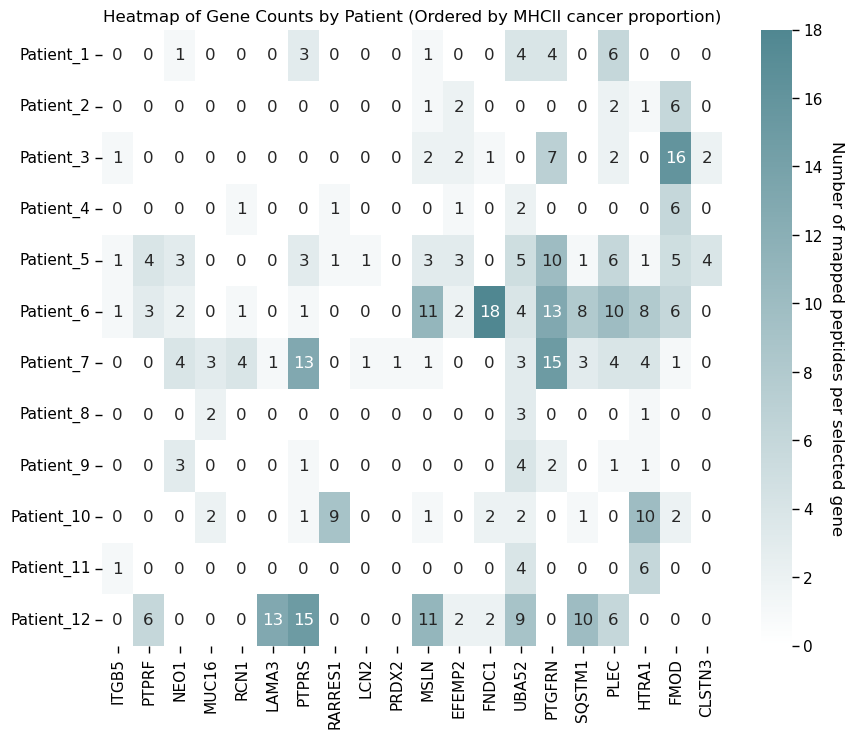

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Define the custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_blue", ["white", "#508791"])

# Sort the rows based on MHC_status in ascending order
# df_sorted = selected_counts.sort_values(by='MHCII_cancer_prop', ascending=True)

# Drop unnecessary columns
selected_gene_counts = selected_counts.drop(columns=['MHCII_cancer_prop'])

sns.set_context("paper", font_scale=1.25)

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
ax = sns.heatmap(selected_gene_counts, cmap=custom_cmap, annot=True, fmt="d", cbar=True)

# Add labels and title
plt.title('Heatmap of Gene Counts by Patient (Ordered by MHCII cancer proportion)')
plt.xlabel('')
plt.ylabel('')

# Set colorbar label
colorbar = ax.collections[0].colorbar
colorbar.set_label("Number of mapped peptides per selected gene", rotation=270, labelpad=15)

# Save the plot as an SVG file
plt.savefig("gene_counts_heatmap.svg", format="svg")

# Show the plot
plt.show()

### Check shared genes in high group

In [5]:
selected_counts['MHCII_group'] = pd.qcut(selected_counts['MHCII_cancer_prop'], q=3, labels=['low', 'mid', 'high'])
selected_counts["MHCII_group"]

/var/folders/xc/lk995w7563j66dr15k7gw56h0000gp/T/ipykernel_66139/3276258539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_counts['MHCII_group'] = pd.qcut(selected_counts['MHCII_cancer_prop'], q=3, labels=['low', 'mid', 'high'])


Patient
Patient_1     high
Patient_2      low
Patient_3      mid
Patient_4      mid
Patient_5      mid
Patient_6      low
Patient_7      low
Patient_8     high
Patient_9      low
Patient_10     mid
Patient_11    high
Patient_12    high
Name: MHCII_group, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

In [6]:
high_based_on_prop = selected_counts[selected_counts['MHCII_group'] == 'high'].index.tolist()
print(high_based_on_prop)

['Patient_1', 'Patient_8', 'Patient_11', 'Patient_12']


In [7]:
# Select only the rows corresponding to the patients in the group
group_df = gene_counts.loc[high_based_on_prop]
print(group_df.head(5))

# Check if the count value for each gene across all selected patients is non-zero
# (i.e., no zero count for the gene across all selected patients)
shared_genes_high_prop = group_df.loc[:, (group_df != 0).all(axis=0)]

# Get the list of genes (columns of the DataFrame correspond to the genes)
shared_genes_list_high_prop = shared_genes_high_prop.columns.tolist()

print(shared_genes_list_high_prop)

Gene        A1BG  A2M  AAMDC  AARS1  AATF  ABCA1  ABCC1  ABCF1  ABCF3  ABHD12  \
Patient                                                                         
Patient_1      4    3      0      0     0      0      1      0      1       0   
Patient_8      2    0      0      0     0      0      0      0      0       0   
Patient_11     0    1      0      0     0      0      0      0      0       1   
Patient_12     6   26      3      0     0      4      0      7      0       0   

Gene        ...  ZNF330  ZNF335  ZNF384  ZNF512  ZNF592  ZNF609  ZNF638  \
Patient     ...                                                           
Patient_1   ...       1       0       2       2       0       0       0   
Patient_8   ...       0       0       1       2       0       2       1   
Patient_11  ...       0       1       4       3       0       0       0   
Patient_12  ...       0       0       0       0       0       0       0   

Gene        ZNRF3  ZRANB2  ZYX  
Patient                      

### Check shared genes in low group

In [8]:
low_based_on_prop = selected_counts[selected_counts['MHCII_group'] == 'low'].index.tolist()
print(low_based_on_prop)

['Patient_2', 'Patient_6', 'Patient_7', 'Patient_9']


In [9]:
# Select only the rows corresponding to the patients in the group
group_df = gene_counts.loc[low_based_on_prop]
print(group_df.head(5))

# Check if the count value for each gene across all selected patients is non-zero
# (i.e., no zero count for the gene across all selected patients)
shared_genes_low_count = group_df.loc[:, (group_df != 0).all(axis=0)]

# Get the list of genes (columns of the DataFrame correspond to the genes)
shared_genes_list_low_prop = shared_genes_low_count.columns.tolist()

print(shared_genes_list_low_prop)

Gene       A1BG  A2M  AAMDC  AARS1  AATF  ABCA1  ABCC1  ABCF1  ABCF3  ABHD12  \
Patient                                                                        
Patient_2     0    7      0      0     0      0      0      0      1       0   
Patient_6     6   58      0      0     0      5      0      2      0       0   
Patient_7     0   15      0      0     0      0      0      0      0       0   
Patient_9     0    3      0      0     0      0      0      0      0       0   

Gene       ...  ZNF330  ZNF335  ZNF384  ZNF512  ZNF592  ZNF609  ZNF638  ZNRF3  \
Patient    ...                                                                  
Patient_2  ...       1       0       2       0       0       0       0      0   
Patient_6  ...       0       0       1       0       1       1       1      1   
Patient_7  ...       0       0       2       1       0       0       0      0   
Patient_9  ...       0       0       2       3       0       0       0      0   

Gene       ZRANB2  ZYX  
Patient

### Select only for genes shared across high group and not present across low group samples

In [10]:
genes_high_only_prop = set(shared_genes_list_high_prop) - set(shared_genes_list_low_prop)
print(len(genes_high_only_prop))

60


In [11]:
# Specify the file path
file_path = '/Volumes/h345/afarkkilab/Projects/NKI/Top28HLAIIAntigens/MHCII_peptides/shared_genes_only_high_based_on_prop.txt'

# Open the file in write mode
with open(file_path, 'w') as f:
    for item in genes_high_only_prop:
        f.write(f"{item}\n")